# Huggingface Ecosystem

- Prepare the following:
    - Dataset
        - loading
        - preprocessing
        - tokenization
    - Model
        - loading
        - storage location
        - model architecture / code
        - model parameters
        - model weights / checkpoints
            - How weights are loaded into the memory
        - model training (pytorch)
        - inference
-
- Inferencing is presented by Ossi!

Huggingface Ecosystem is composed of mainly two parts:
- Family of libraries
    - Provides code
- Hub
    - Provides pretrained model weights, datasets, scripts (evaluation) etc.

<img src='../images/hf_eco.png' width=65%, alt="Hugging Face Ecosystem">

Huggingface library (ecosystem) offers the following important artefacts among many others:
- Huggingface [Datasets 🤗](https://huggingface.co/docs/datasets/index)
    - Audio datasets
    - Computer vision datasets
    - NLP datasets
- Huggingface [Tokenizers](https://huggingface.co/docs/tokenizers/index)
- Huggingface [Transformers](https://huggingface.co/docs/transformers/index)
- Huggingface [Model Hub](https://huggingface.co/docs/hub/models)
- Pipeline ??

### Hugging Face Pipelines
Hugging Face Transformers has a layered API architecture that allows you to interact with the library at various level of abstraction. Pipeline is one of the highest level API that abstracts away all the steps needed to process the inputs and make predictions. It is a great tool to quickly get predictions from a model without having to write any code.

A typical huggingface pipeline looks like this:

**🤗 Datasets** (data_load, data_prep) >> **🤗 Tokenizers** (tokenize_text) >> **🤗 Transformers** (load_model, train/fine-tune, infer) >> **🤗 Datasets** (load_metrics, evaluate)

In [1]:
from transformers import pipeline

#### Text Classification (Sentiment Analysis) Pipeline

In [2]:
# By default the text-classification pipeline uses a model that is designed for sentiment-analysis
# but it also support multi-class and multi-label classification tasks
# You can override the default model to use another model instead using the model argument
# Pipeline takes a string and returns a list of predictions
classifier = pipeline('text-classification')

text = """I recently purchased the BlendMaster X500 from TechKitchen Co., 
lured by its promising features and the rave reviews on their official website. 
However, my experience has been far from satisfactory. 
The motor, despite being labeled as "Ultra-Powerful 1000W", struggles with basic tasks, 
even failing to blend soft fruits like bananas smoothly. 
The touted "QuickClean Pro" feature is misleading; 
I've spent longer cleaning this model than my old BlendEase 300. 
To add to the woes, the SuperSeal lid is a misnomer; it leaked during my second use, 
creating a mess on my countertop. 
I genuinely regret opting for the BlendMaster X500 and would urge potential buyers to consider other options.
"""

predictions = classifier(text)
print(predictions)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.999460756778717}]


#### Named-Entity Recognition (NER) Pipeline

In [3]:
import pandas as pd
ner_tagger = pipeline('ner', aggregation_strategy='simple')
ner_tags = ner_tagger(text)
pd.DataFrame(ner_tags)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,entity_group,score,word,start,end
0,MISC,0.980379,BlendMaster X500,25,41
1,ORG,0.985157,TechKitchen Co.,47,62
2,MISC,0.972579,QuickClean Pro,361,375
3,MISC,0.910016,BlendEase 300,451,464
4,MISC,0.855905,SuperS,491,497
5,MISC,0.982523,BlendMaster X500,622,638


#### Question Answering Pipeline

In [4]:
qna = pipeline('question-answering')
question = "what is the name of the company that makes the BlendMaster X500?"
answer = qna(question=question, context=text)
pd.DataFrame([answer])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.63558,47,62,TechKitchen Co.


#### Text Summarization Pipeline

In [5]:
summarizer = pipeline('summarization')
summary = summarizer(text, max_length=50, min_length=30)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 The touted "QuickClean Pro" feature is misleading . The SuperSeal lid is a misnomer; it leaked during my second use, creating a mess on my countertop .


#### Translation Pipeline

In [6]:
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-en-de')
translation = translator(text, clean_up_tokenization_spaces=True, min_length=50)
print(translation[0]['translation_text'])

Vor kurzem kaufte ich den BlendMaster X500 von TechKitchen Co., gelockt durch seine vielversprechenden Funktionen und die Rave-Bewertungen auf ihrer offiziellen Website. Allerdings war meine Erfahrung bei weitem nicht zufriedenstellend. Der Motor, obwohl als "Ultra-Powerful 1000W" gekennzeichnet, kämpft mit grundlegenden Aufgaben, sogar nicht zu mischen weiche Früchte wie Bananen reibungslos. Die angepriesene "QuickClean Pro"-Funktion ist irreführend; Ich habe längere Reinigung dieses Modell als meine alte BlendEase 300 verbracht. Um den Wehen hinzuzufügen, ist der SuperSeal Deckel ein Fehlname; es leckte während meiner zweiten Verwendung, die Schaffung eines Chaos auf meiner Arbeitsplatte. Ich bedauere wirklich, die Wahl für den BlendMaster X500 und würde potenzielle Käufer zu erwägen, andere Optionen.


#### Text Generation Pipeline

In [7]:
generator = pipeline('text-generation')
response = "Dear customer, I am sorry to hear about your experience with the BlendMaster X500."
prompt = text + "\n\nCustomer service response:" + response
generated_text = generator(prompt, max_length=500, num_return_sequences=3)
print(generated_text[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I recently purchased the BlendMaster X500 from TechKitchen Co., 
lured by its promising features and the rave reviews on their official website. 
However, my experience has been far from satisfactory. 
The motor, despite being labeled as "Ultra-Powerful 1000W", struggles with basic tasks, 
even failing to blend soft fruits like bananas smoothly. 
The touted "QuickClean Pro" feature is misleading; 
I've spent longer cleaning this model than my old BlendEase 300. 
To add to the woes, the SuperSeal lid is a misnomer; it leaked during my second use, 
creating a mess on my countertop. 
I genuinely regret opting for the BlendMaster X500 and would urge potential buyers to consider other options.


Customer service response:Dear customer, I am sorry to hear about your experience with the BlendMaster X500. 

We are currently evaluating the product and feel that it has met our expectations. 

Given the strong feedback that we have received, this product has come to us as an attractive alternativ

## Datasets

In [8]:
from huggingface_hub import list_datasets
from datasets import load_dataset

In [9]:
all_datasets = list_datasets()

In [10]:
next(all_datasets)

DatasetInfo: { 
  {'_id': '621ffdd236468d709f181d58',
   'author': None,
   'cardData': None,
   'citation': '@inproceedings{veyseh-et-al-2020-what,\n'
               '   title={{What Does This Acronym Mean? Introducing a New Dataset for Acronym Identification and '
               'Disambiguation}},\n'
               '   author={Amir Pouran Ben Veyseh and Franck Dernoncourt and Quan Hung Tran and Thien Huu Nguyen},\n'
               '   year={2020},\n'
               '   booktitle={Proceedings of COLING},\n'
               '   link={https://arxiv.org/pdf/2010.14678v1.pdf}\n'
               '}',
   'description': 'Acronym identification training and development sets for the acronym identification task at '
                  'SDU@AAAI-21.',
   'disabled': False,
   'downloads': 5236,
   'gated': False,
   'id': 'acronym_identification',
   'lastModified': '2023-01-25T14:18:28.000Z',
   'likes': 17,
   'paperswithcode_id': 'acronym-identification',
   'private': False,
   'sha': 'c3c245a1

### Load dataset (e.g., emotions)

The dataset in Huggingface follows apache arrow format. The dataset can be loaded from the Huggingface Datasets library.

Apache arrow format is a columnar format that is optimized for fast loading and efficient memory usage. It is language agnostic unlike pandas. It is a common format for data science and machine learning tasks.

The dataset usually has the following structure:

- `train` (Dataset)
    - `text` (str)
    - `label` (int)
- `validation` (Dataset)
    - `text` (str)
    - `label` (int)
- `test` (Dataset)
    - `text` (str)
    - `label` (int)

The datasets in HF are downloaded and cached locally in `~/.cache/huggingface/datasets/`. The dataset can be loaded from the cache using the `load_dataset()` function.

In [11]:
emotion_dataset = load_dataset('emotion')

In [12]:
emotion_dataset # Apache-arrow format

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
train_set = emotion_dataset['train']
train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [14]:
len(train_set)

16000

In [15]:
train_set[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [16]:
train_set.column_names

['text', 'label']

In [17]:
train_set.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [18]:
train_set[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [19]:
train_set['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

### From Datasets to Dataframes

The dataset can be converted to a pandas dataframe by setting the format to `pandas` using set_format() function.

In [20]:
import pandas as pd
emotion_dataset.set_format(type='pandas')
df = emotion_dataset['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [21]:
def label_int2str(row):
    return emotion_dataset['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Exploratory Data Analysis

Once the dataset is available as a dataframe, we can perform exploratory data analysis (EDA) on the dataset.

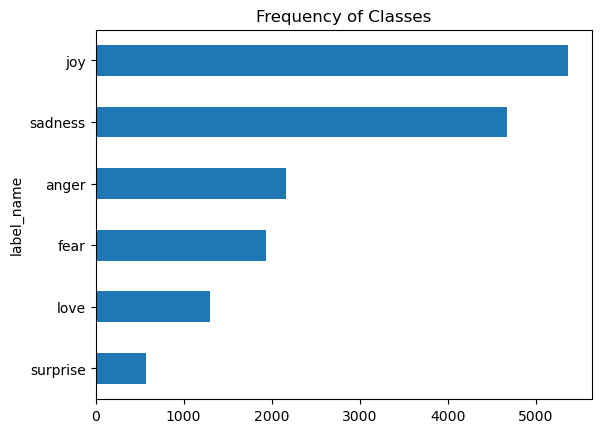

In [24]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

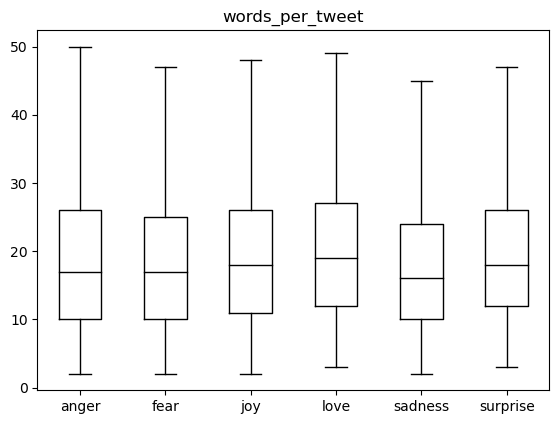

In [25]:
df['words_per_tweet'] = df['text'].str.split().apply(len)
df.boxplot('words_per_tweet', by='label_name', grid=False, showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

## Tokenizers: From Text to Tokens

One of the most important steps in NLP is to convert text to tokens. This is done using tokenizers. Huggingface provides a tokenizer library that can be used to tokenize text.

### Character Tokenization

In [26]:
text = 'Tokenization text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [27]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'x': 17, 'z': 18}


In [28]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 13, 11, 8, 12, 10, 18, 6, 16, 10, 13, 12, 0, 16, 8, 17, 16, 0, 10, 15, 0, 6, 0, 7, 13, 14, 8, 0, 16, 6, 15, 11, 0, 13, 9, 0, 3, 2, 4, 1]


In [29]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape


print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Problems with Character Tokenization:
- Ignores the structure of the text and treat the text as a stream of characters
- Though it helps to deal with misspellings and rare words and vocabulary size is also small but the main drawback is that linguistic strcutures like words has to be learned which requires significant compute, memory and data.
- Because of these challenges character tokenization is rearely used in practice

## Word Tokenization

In [30]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenization', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### Problems with Word Tokenization:
- Does not account for punctuation e.g. NLP. is treated as one token
- Leads to a very large vocabulary size which results in having enormous amount of paramters for the neural network
  - If we have 1 million words which we want to map to 1000-dimensional vector (encoding) in first layer of NN
  - This will result in 1M x 1k = 1B weights (GPT-2 had 1.5B parameters in total)
- We could alternatively also reduce vocabulary to say 100k by replacing rare words with <UNK> token but we will loose a lot of information
- Its usually better to pick best of the both character and word tokenization 

## Subword Tokenization

We want to combine the best aspects of both character and word tokenization. On one-hand we want to split rare words into smaller units to allow model to deal with complext words and misspellings. On the other hand, we want to keep frquent words as unique entities so that we can keep the length of our inputs to a manageable size.

In [31]:
from transformers import AutoTokenizer, DistilBertTokenizerFast

In [32]:
model_checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [33]:
distilbert_tokenizer = DistilBertTokenizerFast.from_pretrained(model_checkpoint)

In [34]:
encoded_text = tokenizer(text)
tokenized_text = tokenizer.tokenize(text)
print(encoded_text)
print(tokenized_text)

{'input_ids': [101, 19204, 3989, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['token', '##ization', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.']


In [35]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
print(tokens)

['[CLS]', 'token', '##ization', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [36]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenization text is a core task of nlp. [SEP]


In [37]:
tokenizer.vocab_size

30522

In [38]:
tokenizer.model_max_length

512

In [39]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

#### Tokenizer the whole dataset

In [40]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

print(emotion_dataset['train'][0:2])

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0


## Models

In [41]:
from huggingface_hub import list_models

In [42]:
all_models = list_models()
next(all_models)

ModelInfo: { 
  {'_id': '621ffdc036468d709f174328',
   'author': None,
   'config': None,
   'downloads': 56731,
   'id': 'albert-base-v1',
   'lastModified': None,
   'likes': 3,
   'modelId': 'albert-base-v1',
   'pipeline_tag': 'fill-mask',
   'private': False,
   'securityStatus': None,
   'sha': None,
   'siblings': [],
   'tags': ['transformers', 'pytorch', 'tf', 'safetensors', 'albert', 'fill-mask', 'en', 'dataset:bookcorpus',
            'dataset:wikipedia', 'arxiv:1909.11942', 'exbert', 'license:apache-2.0', 'autotrain_compatible', 'has_space',
            'region:us']}
}

### Download and Load a model

- Models e.g.,
    - GPT2
    - BERT
    - T5
- AutoModel vs AutoModelForSequenceClassification

In [45]:
from transformers import AutoModel

model_checkpoint = 'gpt2'
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
model = AutoModel.from_pretrained(model_checkpoint).to(device)

In [61]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

model_checkpoint = 'gpt2-medium'
tokenizer = GPT2Tokenizer.from_pretrained(model_checkpoint)
model = GPT2LMHeadModel.from_pretrained(model_checkpoint)

In [71]:
model.config

GPT2Config {
  "_name_or_path": "gpt2-medium",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 1024,
  "n_head": 16,
  "n_inner": null,
  "n_layer": 24,
  "n_positions": 1024,
  "n_special": 0,
  "predict_special_tokens": true,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.33.1",
  "use_cache": true,
  "vocab_size": 50257
}

### Inferencing

#### Prepare the input

In [99]:
# Tokenize input with attention mask
input_text = "once upon a time"
inputs = tokenizer(input_text, return_tensors="pt", truncation=True)

#### Perform inference

In [100]:
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits # raw logits from the last layer

print(logits.shape)
print(logits)

torch.Size([1, 4, 50257])
tensor([[[ -68.1566,  -65.3417,  -71.5620,  ...,  -77.9625,  -74.2637,
           -69.8652],
         [-222.5967, -222.2235, -228.0917,  ..., -237.4984, -236.3385,
          -223.4636],
         [-151.4483, -149.3703, -156.5388,  ..., -162.4841, -159.7472,
          -149.2175],
         [ -59.1032,  -54.8393,  -62.8404,  ...,  -68.8518,  -66.1366,
           -60.9544]]])


#### Result Interpretation
The shape of logits/probabilities is as follows:
- (batch_size, sequence_length, vocab_size). 
- In our case (1, 4, 50257):
    - batch_size = 1 meaning one input sequence
    - sequence_length = 4 meaning four tokens in the input sequence
    - vocab_size = 50257 meaning 50257 tokens in the vocabulary of the GPT2 model
- For each token in the input sequence, the model outputs a probability distribution over the vocabulary.

In [101]:
import torch.nn.functional as F

# Convert logits to probabilities using softmax
probabilities = F.softmax(logits, dim=-1)

# Select the token with the highest probability
predicted_tokens = torch.argmax(probabilities, dim=-1)

# Decode the tokens to get the text
predicted_text = tokenizer.decode(predicted_tokens[0].tolist(), skip_special_tokens=True)

print(probabilities.shape)
print(predicted_text)

torch.Size([1, 4, 50257])
- a time,


Okay the output does not look as we would expect GPT2 to produce. The reason for that is the way we are intereting the output. We are taking argmax over probablities of each token in the input sequence. This is not the right way to interpret the output for auto-regressive models like GPT2. Auto-regressive model takes the generated token and feed it back as input to the model to generate the next token.

So we should use the generate() function from model object to generate all the tokens in the sequence as follows:

In [102]:
input_text = "once upon a time"
inputs = tokenizer.encode(input_text, return_tensors="pt", truncation=True) # returns a list of token ids

with torch.no_grad():
    generated_ids = model.generate(inputs, max_length=50, num_return_sequences=1, temperature=1.0, top_k=50, top_p=0.95)

# Convert the generated_ids to text using the tokenizer
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


once upon a time, I was a little boy, and I was a little boy who was a little boy who was a little boy who was a little boy who was a little boy who was a little boy who was a little boy who was a


### Custom/Local Models

In [51]:
# Load a custom model from Hugging Face Hub
#model = BertModel.from_pretrained('username/custom-bert-model')

# Load a custom model from a local directory (e.g., your own model or previously downloaded model from Hugging Face Hub)
#model = BertModel.from_pretrained('/path/to/local/model/directory/')

## Huggingface Model Architecture (Text Classifier)

A typical Huggingface model architecture for text classification looks like this:

<img src='../images/hf_model_architecture.png' width=80%>

There are two options to train such a model:
- Feature extraction
    - Use a pretrained model and add a classifier on top of it
    - Freeze the pretrained model and train the classifier only
- Fine-tuning
    - Use a pretrained model and train the whole model (including the pretrained model)